In [2]:
########## GEMINI行情接口 ##############
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent = 4))

{
    "bid": "47116.41",
    "ask": "47124.60",
    "volume": {
        "BTC": "454.10692066",
        "USD": "21494267.5569419961",
        "timestamp": 1641125400000
    },
    "last": "47112.03"
}


    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice     Volume  \
0  1637503200   59120.16   59130.66  58872.70    58893.70   4.786785   
1  1637506800   58893.70   59083.91  58765.53    58969.63   9.140279   
2  1637510400   58946.75   59315.78  58868.40    59286.74  15.018728   
3  1637514000   59267.46   59999.99  59200.53    59919.45  54.615882   
4  1637517600   59919.45   60061.89  59494.37    59511.02  41.369172   

             NA  
0  2.825441e+05  
1  5.385602e+05  
2  8.885831e+05  
3  3.255036e+06  
4  2.476997e+06  


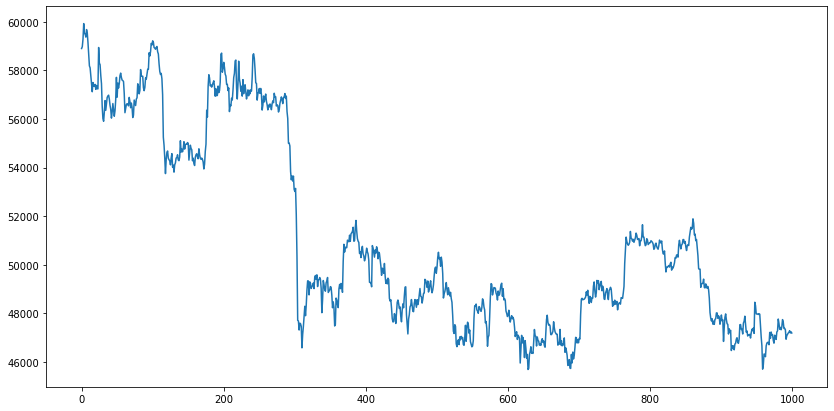

In [3]:
# 比特币过去一个小时再Gemini交易所的价格曲线

import matplotlib.pyplot as plt
import pandas as pd
import requests

# 选择要获取的数据时间段
periods = '3600'

# 通过http抓去btc历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc',
    params = {
        'periods': periods
    })
data = resp.json()

# 转换成pandas data frame
df = pd.DataFrame(
    data['result'][periods],
    columns = [
        'CloseTime',
        'OpenPrice',
        'HighPrice',
        'LowPrice',
        'ClosePrice',
        'Volume',
        'NA'])

# 输出DataFrame的头部几行
print(df.head())

# 绘制btc价格曲线
df['ClosePrice'].plot(figsize=(14,7))
plt.show()